In [1]:
from pathlib import Path
from pprint import pprint

import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from PIL import Image

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Dropout, GlobalMaxPooling2D, Input, Flatten, MaxPooling2D, Lambda, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# paths to train and test data
train_data_dir = 'C:/Users/miche/Tesi/train_data'
test_data_dir = 'C:/Users/miche/Tesi/test_data'

In [3]:
# creating generators
datagen = ImageDataGenerator(rescale=1 / 255.0)

train_batch_size, test_batch_size = 53, 241
train_generator = datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=train_batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42)

test_generator = datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(64, 64),
    color_mode="rgb",
    batch_size=test_batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 53 images belonging to 12 classes.
Found 241 images belonging to 12 classes.


In [4]:
train_dataset, y_train = next(train_generator)
test_dataset, y_test = next(test_generator)

train_labels = np.empty(len(y_train), dtype=int)
test_labels = np.empty(len(y_test), dtype=int)

for i in range(len(y_train)):
    train_labels[i] = (np.where(y_train[i]==1)[0][0])
for j in range(len(y_test)):
    test_labels[j] = (np.where(y_test[j]==1)[0][0])

stampa = test_dataset

In [5]:
def stampa(ds, ds_labels, class_names):
  fig = plt.figure()
  for i in range(9):
      plt.subplot(3,3,i+1)
      plt.tight_layout()
      plt.imshow(ds[i])
      plt.title("Oggetto: {}".format(class_names[train_labels[i]]))
      plt.xticks([])
      plt.yticks([])

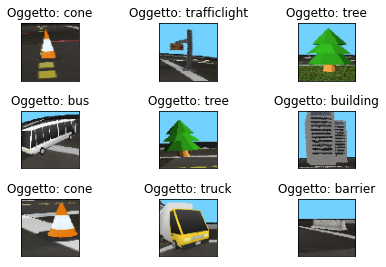

In [6]:
# plotting some samples
CLASS_NAMES = ['barrier','building','bus','cone','duckie','duckiebot','ground','sky','stop','trafficlight','tree','truck']
stampa(train_dataset, train_labels, CLASS_NAMES)

In [7]:
model = Sequential(
    [
        Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=2),
        Dropout(0.3),
        Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=2),
        Dropout(0.3),
        GlobalMaxPooling2D(),
        Flatten(),

        Dense(128, activation='relu'),
        Dense(12, activation='softmax')
    ]
)

In [8]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5, beta_2=0.999))

In [9]:
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [10]:
history_crossentropy = model.fit(train_dataset, y_train,
          batch_size=5, epochs=150,
          verbose=2,
          validation_data=(test_dataset, y_test),
          callbacks=[callback])

Train on 53 samples, validate on 241 samples
Epoch 1/150
53/53 - 1s - loss: 2.6225 - accuracy: 0.0566 - val_loss: 2.4555 - val_accuracy: 0.0954
Epoch 2/150
53/53 - 1s - loss: 2.4922 - accuracy: 0.0189 - val_loss: 2.4324 - val_accuracy: 0.1037
Epoch 3/150
53/53 - 1s - loss: 2.4464 - accuracy: 0.0943 - val_loss: 2.4080 - val_accuracy: 0.1743
Epoch 4/150
53/53 - 1s - loss: 2.4054 - accuracy: 0.1321 - val_loss: 2.3738 - val_accuracy: 0.2448
Epoch 5/150
53/53 - 1s - loss: 2.2880 - accuracy: 0.1887 - val_loss: 2.2981 - val_accuracy: 0.2407
Epoch 6/150
53/53 - 1s - loss: 2.1551 - accuracy: 0.2642 - val_loss: 2.1899 - val_accuracy: 0.2116
Epoch 7/150
53/53 - 1s - loss: 1.9880 - accuracy: 0.2075 - val_loss: 2.0677 - val_accuracy: 0.5270
Epoch 8/150
53/53 - 1s - loss: 1.8037 - accuracy: 0.3774 - val_loss: 1.9698 - val_accuracy: 0.2573
Epoch 9/150
53/53 - 1s - loss: 1.5697 - accuracy: 0.3962 - val_loss: 1.7485 - val_accuracy: 0.5353
Epoch 10/150
53/53 - 1s - loss: 1.3558 - accuracy: 0.5849 - val_

In [11]:
def plot_metrics(history):
  # plotting the metrics
  fig = plt.figure()
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

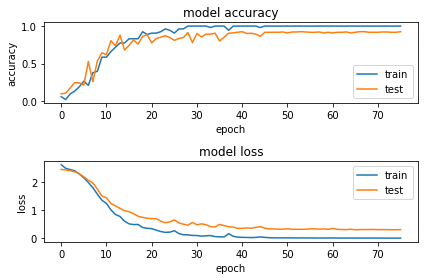

In [12]:
plot_metrics(history_crossentropy)

In [13]:
import time

In [14]:
loss_and_metrics = model.evaluate(test_dataset, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

241/241 - 0s - loss: 0.3061 - accuracy: 0.9253
Test Loss 0.3060753833950802
Test Accuracy 0.9253112


In [15]:
predicted_classes_crossentropy = model.predict_classes(test_dataset)

# see which we predicted correctly and which not
correct_indices_crossentropy = np.nonzero(predicted_classes_crossentropy == test_labels)[0]
incorrect_indices_crossentropy = np.nonzero(predicted_classes_crossentropy != test_labels)[0]
print()
print(len(correct_indices_crossentropy)," classified correctly")
print(len(incorrect_indices_crossentropy)," classified incorrectly")


223  classified correctly
18  classified incorrectly


In [16]:
t0= time.clock()
model.predict(test_dataset)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.4561536  seconds


In [17]:
print(test_dataset.shape)
prova = test_dataset[0]
print(prova.shape)
prova = prova.reshape(1,64,64,3)
print(prova.shape)

(241, 64, 64, 3)
(64, 64, 3)
(1, 64, 64, 3)


In [18]:
t0= time.clock()
model.predict(prova)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")

Time elapsed:  0.050998199999999994  seconds


In [19]:
def stampa_eval(correct_indices, incorrect_indices, predicted_classes):
  # adapt figure size to accomodate 18 subplots
  plt.rcParams['figure.figsize'] = (7,14)

  figure_evaluation = plt.figure()

  # plot 9 correct predictions
  for i, correct in enumerate(correct_indices[:9]):
      plt.subplot(6,3,i+1)
      plt.imshow(test_dataset[correct], interpolation='none')
      plt.title(
        "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                          test_labels[correct]))
      plt.xticks([])
      plt.yticks([])

  # plot 9 incorrect predictions
  for i, incorrect in enumerate(incorrect_indices[:9]):
      plt.subplot(6,3,i+10)
      plt.imshow(test_dataset[incorrect], interpolation='none')
      plt.title(
        "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                        test_labels[incorrect]))
      plt.xticks([])
      plt.yticks([])

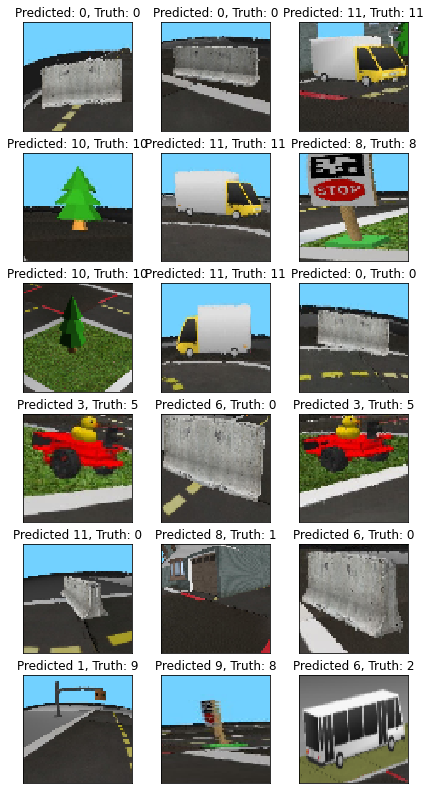

In [20]:
stampa_eval(correct_indices_crossentropy, incorrect_indices_crossentropy, predicted_classes_crossentropy)

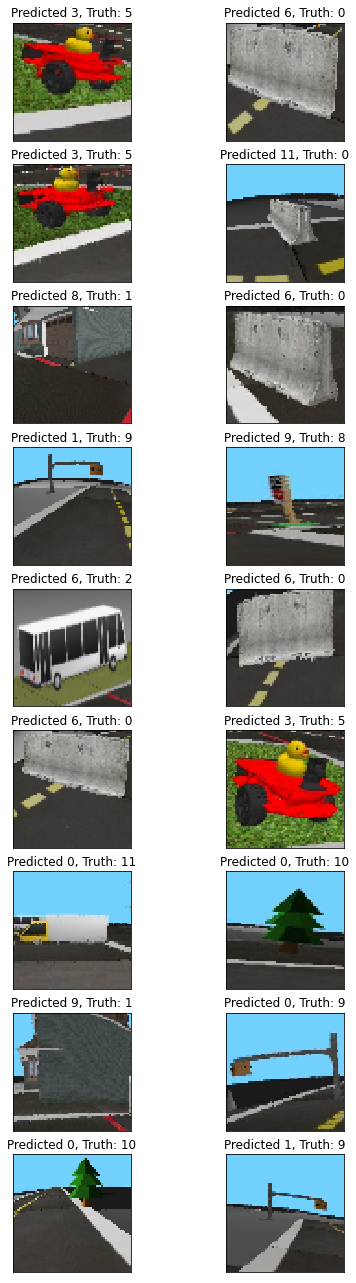

In [21]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,36)

figure_evaluation = plt.figure()

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices_crossentropy):
    plt.subplot(14,2,i+1)
    plt.imshow(test_dataset[incorrect], interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes_crossentropy[incorrect], 
                                      test_labels[incorrect]))
    plt.xticks([])
    plt.yticks([])

In [22]:
dir = 'C:/Users/miche/Desktop/Tesi/prova_finale'
list_ds = tf.data.Dataset.list_files(dir+'*/*.png')

In [23]:
for f in list_ds.take(5):
  print(f.numpy())

b'C:\\Users\\miche\\Desktop\\Tesi\\prova_finale\\prova_finale_7.png'


In [24]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [25]:
IMG_HEIGHT, IMG_WIDTH = 192, 192
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [26]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [27]:
import os
AUTOTUNE = tf.data.experimental.AUTOTUNE
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (192, 192, 3)
Label:  [False False False False False False False False False False False False]


In [28]:
def prepare_for_training(ds, batch_size, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(batch_size)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [29]:
data = prepare_for_training(labeled_ds, 1)
image_batch, labels = next(iter(data))

(-0.5, 191.5, 191.5, -0.5)

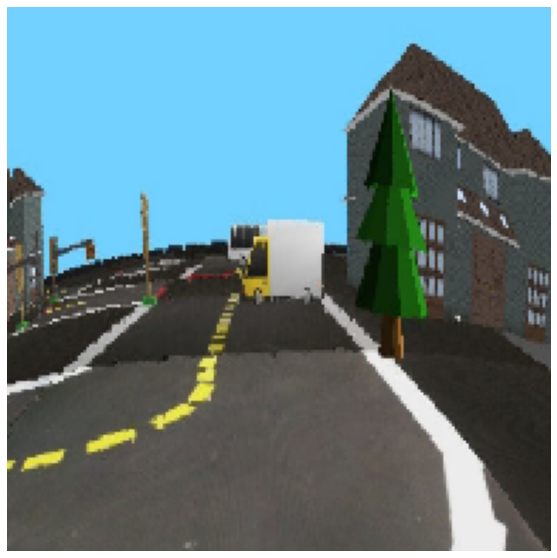

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(image_batch[0])
plt.axis('off')

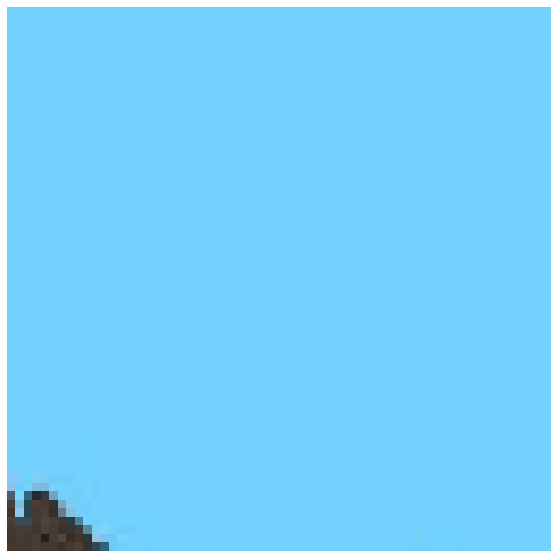

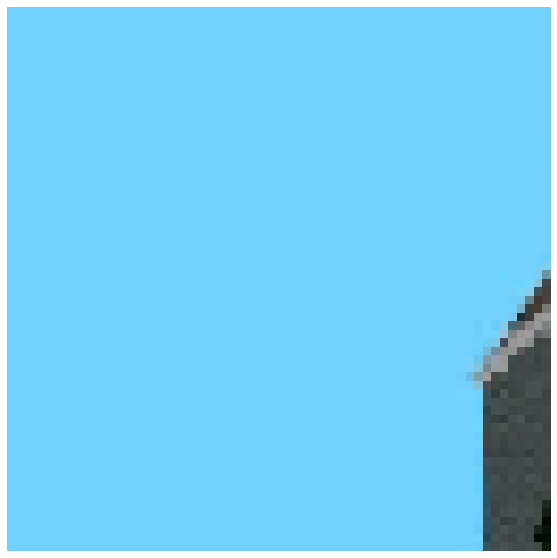

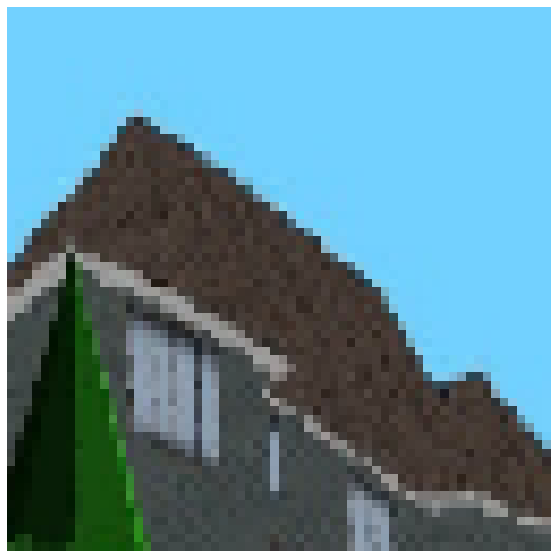

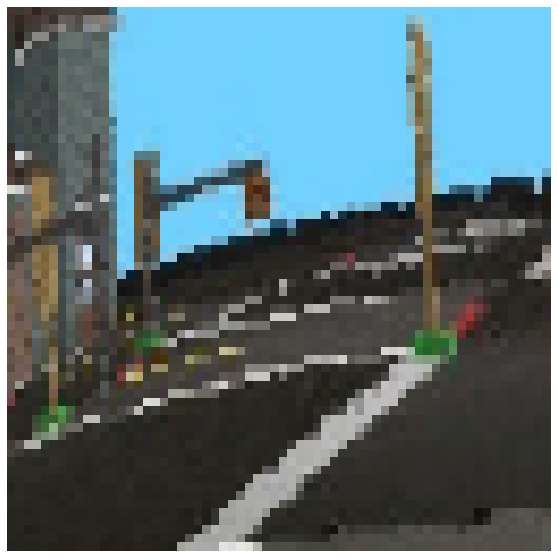

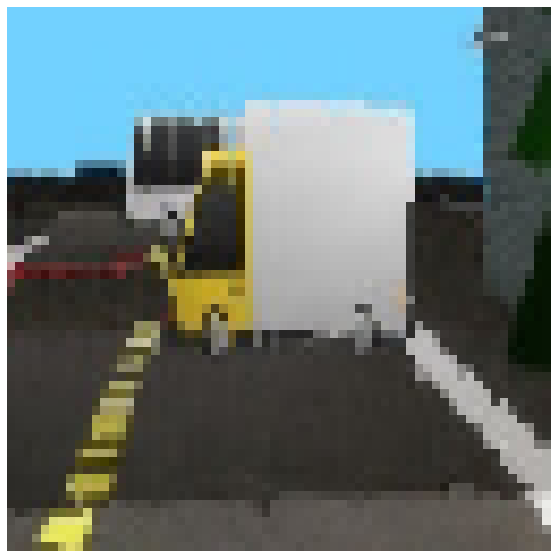

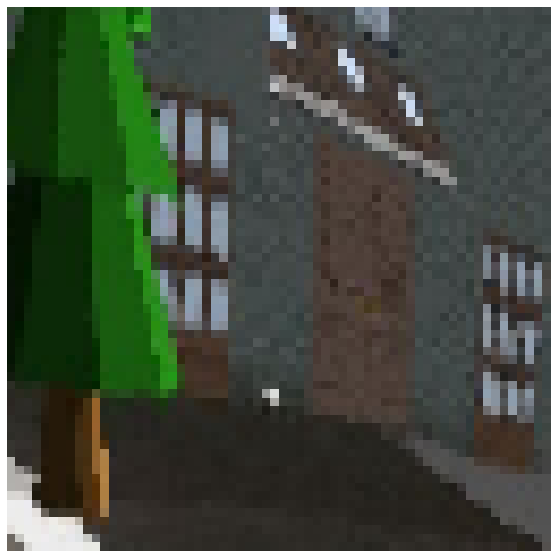

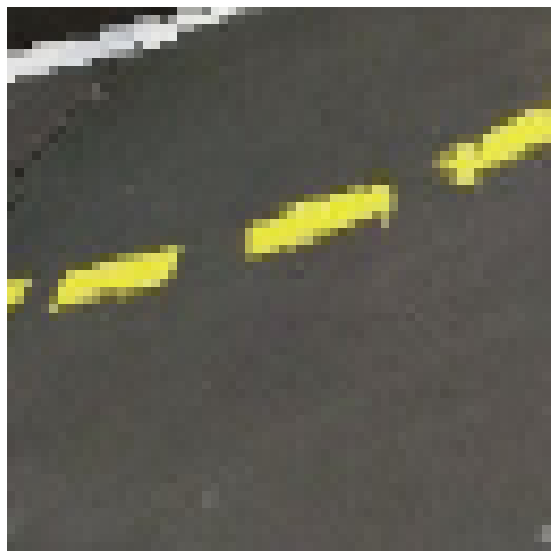

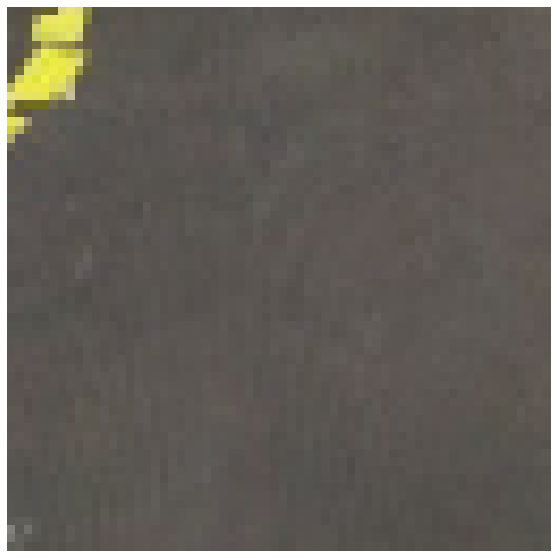

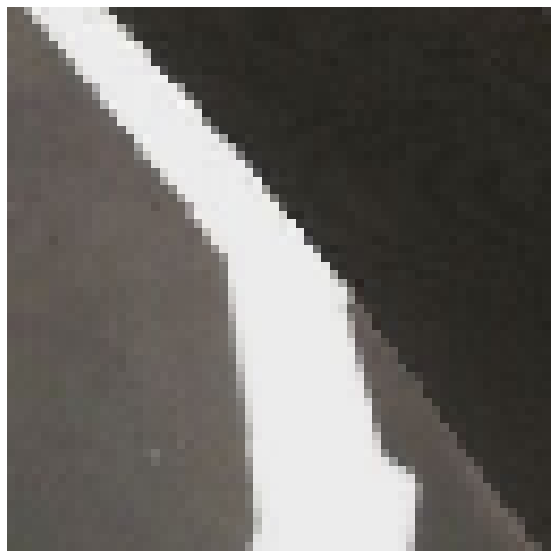

In [31]:
t0= time.clock()
image = image_batch[0]
patches = []
for i in range(3):
  for j in range(3):
    patch = tf.image.crop_to_bounding_box(image, i*64, j*64, 64, 64)
    patches.append(patch)
    plt.figure(figsize=(10,10))
    plt.imshow(patch)
    plt.axis('off')

In [32]:
batch = np.array(patches)
print(batch.shape)

(9, 64, 64, 3)


In [33]:
predicted_classes = model.predict_classes(batch)
t1 = time.clock() - t0
print("Time elapsed: ", t1, " seconds")
print(predicted_classes)

Time elapsed:  13.5658407  seconds
[ 1  7  1  1 11 10  6  6  6]


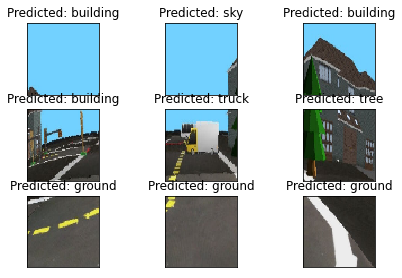

In [34]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.imshow(patches[i], interpolation='none')
    plt.title(
      "Predicted: {}".format(CLASS_NAMES[predicted_classes[i]]))
    plt.xticks([])
    plt.yticks([])